In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data.csv')

In [19]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

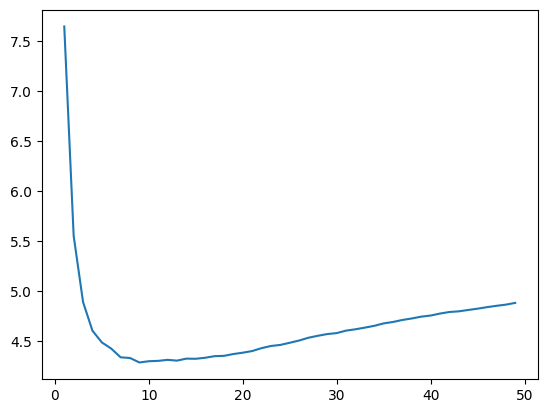

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

losses = []
k_values = list(range(1, 50))

for k in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=k , metric= 'euclidean' , n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    losses.append(mean_squared_error(y_test, y_pred))

plt.plot(k_values, losses)

In [22]:
k = k_values[np.argmin(losses)]
print(f'Best k: {k}')

Best k: 9


In [23]:
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)

y_pred = knn.predict(X_test)

y_data = knn.predict(X)

print('Train Set:')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'R2: {r2_score(y_train, y_train_pred)}')

print()

print('Test Set:')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

print()

print('Data Set:')
print(f'MSE: {mean_squared_error(y, y_data)}')
print(f'MAE: {mean_absolute_error(y, y_data)}')
print(f'R2: {r2_score(y, y_data)}')

Train Set:
MSE: 3.432736155676608
MAE: 1.3898682934109394
R2: 0.9268286079770576

Test Set:
MSE: 4.290018797265174
MAE: 1.545091675526458
R2: 0.9074504009875676

Data Set:
MSE: 3.7186692727387034
MAE: 1.4416711747843876
R2: 0.9204191462177846
